In [1]:
import oceanspy as ospy
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cmo
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from matplotlib.colors import Normalize
from matplotlib.collections import LineCollection
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import ListedColormap

plt.rcParams.update({
    'font.size': 11,       # Default text size
    'axes.titlesize': 10,  # Title size
    'axes.labelsize': 10,  # Axis label size
    'xtick.labelsize': 8, # X-tick label size
    'ytick.labelsize': 8, # Y-tick label size
    'legend.fontsize': 8, # Legend font size
    'figure.titlesize': 10 # Figure title size
})

In [2]:
df = xr.open_dataset('/nird/projects/NS9608K/MSc_EK/Data/weighted_S.nc')
df_full_Z = xr.open_dataset('/nird/projects/NS9608K/MSc_EK/Data/weighted_S_full_Z_27E8E66N76N.nc')

In [3]:
df

<xarray.Dataset>
Dimensions:       (Z: 34, Zp1: 35, Zu: 34, Zl: 34, X: 378, Y: 518, Xp1: 379,
                   Yp1: 519, time: 12, time_midp: 11)
Coordinates: (12/18)
  * Z             (Z) float64 -1.0 -3.5 -7.0 -11.5 ... -445.5 -464.5 -483.5
  * Zp1           (Zp1) float64 0.0 -2.0 -5.0 -9.0 ... -455.0 -474.0 -493.0
  * Zu            (Zu) float64 -2.0 -5.0 -9.0 -14.0 ... -455.0 -474.0 -493.0
  * Zl            (Zl) float64 0.0 -2.0 -5.0 -9.0 ... -436.0 -455.0 -474.0
  * X             (X) float64 -29.92 -29.84 -29.76 ... -10.09 -10.05 -10.0
  * Y             (Y) float64 66.01 66.02 66.04 66.05 ... 75.91 75.95 75.99
    ...            ...
  * time          (time) datetime64[ns] 2017-09-01 2017-10-01 ... 2018-08-01
    YU            (Y, Xp1) float64 ...
    XU            (Y, Xp1) float64 ...
    YV            (Yp1, X) float64 ...
    XV            (Yp1, X) float64 ...
  * time_midp     (time_midp) datetime64[ns] 2017-09-16 ... 2018-07-16T12:00:00
Data variables: (12/30)
    drC           (Zp1) float64 ...
    drF           (Z) float64 ...
    rA            (Y, X) float64 ...
    rAw           (Y, Xp1) float64 ...
    rAs           (Yp1, X) float64 ...
    rAz           (Yp1, Xp1) float64 ...
    ...            ...
    w_mean_HFacW  float64 ...
    weight_HFacW  (Z, Y, Xp1) float64 ...
    w_mean_HFacS  float64 ...
    weight_HFacS  (Z, Yp1, X) float64 ...
    w_mean_S      float64 ...
    weight_S      (time, Z, Y, X) float64 ...
Attributes: (12/24)
    MITgcm_version:          checkpoint67l
    build_user:              malmans2@jhu.edu
    build_host:              compute0673
    build_date:              Fri Nov  8 01:36:45 EST 2019
    MITgcm_URL:              http://mitgcm.org
    MITgcm_tag_id:           
    ...                      ...
    OceanSpy_parameters:     {'rSphere': 6371.0, 'eq_state': 'mdjwf', 'rho0':...
    OceanSpy_name:           IGPyearlong
    OceanSpy_description:    High-resolution numerical simulation carried out...
    OceanSpy_projection:     Mercator(**{})
    OceanSpy_grid_coords:    {'Y': {'Y': None, 'Yp1': 0.5}, 'X': {'X': None, ...
    OceanSpy_grid_periodic:  []

In [4]:
print(df['w_mean_S'].values)

34.56699038557085


In [5]:
S_ref = []
for time_step in range(len(df.time)):
    month = (df['S'][time_step] * df['weight_S'][time_step]).sum()
    month = month / df['weight_S'][time_step].sum()
    S_ref.append(month.values)


In [6]:
for i in S_ref:
    print(i)

34.506395682868394
34.520164869790634
34.54715949607103
34.5676714422021
34.567124541200165
34.571661156851135
34.58159306649986
34.598882539434726
34.60255370897912
34.59635371329062
34.57957458763814
34.56442818669604


In [7]:
print(np.round(df['w_mean_S'].values,2),'+/-',np.round(np.std(S_ref),2))

34.57 +/- 0.03


# Reference salinity of the Greenland and Iceland Sea

In [22]:
S_ref_full_Z = []
for time_step in range(len(df_full_Z.time)):
    month = (df_full_Z['S'][time_step] * df_full_Z['weight_S'][time_step]).sum()
    month = month / df_full_Z['weight_S'][time_step].sum()
    S_ref_full_Z.append(month.values)

for i in range(len(S_ref_full_Z)):
    print(np.round(S_ref_full_Z[i],2),' ',str(df_full_Z.time.values[i])[:7])

print(np.round(df_full_Z['w_mean_S'].values,2),'+/-',np.round(np.std(S_ref_full_Z),2))

34.79   2017-09
34.8   2017-10
34.81   2017-11
34.82   2017-12
34.81   2018-01
34.82   2018-02
34.82   2018-03
34.82   2018-04
34.82   2018-05
34.82   2018-06
34.81   2018-07
34.81   2018-08
34.81 +/- 0.01


In [9]:
depth = xr.open_dataset(r'/nird/projects/NS9608K/MSc_EK/Data/Depth_res.nc')['Depth'].sel(Y=slice(66,79)).sel(X=slice(-30,10))
depth = depth.sel(X=slice(-27,-8)).sel(Y=slice(66,76))
depth_notZero = depth
depth = depth.where(depth>=0,np.nan)
display(depth)

<xarray.DataArray 'Depth' (Y: 518, X: 385)>
array([[ 550.        ,  512.        ,  447.28398166, ..., 1519.        ,
        1555.78758067, 1585.5       ],
       [ 569.        ,  527.32003511,  484.63276808, ..., 1511.21922598,
        1550.68733335, 1590.28220652],
       [ 588.        ,  531.        ,  521.64146793, ..., 1509.5       ,
        1550.47961466, 1594.4667498 ],
       ...,
       [   0.        ,    0.        ,    0.        , ..., 1813.5       ,
        1832.93459977, 1870.5       ],
       [   0.        ,    0.        ,    0.        , ..., 1728.        ,
        1766.        , 1801.73839567],
       [   0.        ,    0.        ,    0.        , ..., 1629.90179043,
        1680.5       , 1737.5       ]])
Coordinates:
  * X        (X) float64 -26.96 -26.89 -26.83 -26.76 ... -8.094 -8.051 -8.007
  * Y        (Y) float64 66.01 66.02 66.04 66.05 ... 75.87 75.91 75.95 75.99
    XC       (Y, X) float64 -26.96 -26.89 -26.83 -26.76 ... -8.094 -8.051 -8.007
    YC       (Y, X) float64 66.01 66.01 66.01 66.01 ... 75.99 75.99 75.99 75.99
Attributes:
    description:    fluid thickness in r coordinates (at rest)
    standard_name:  ocean_depth
    long_name:      ocean depth
    units:          m
    coordinate:     XC YC

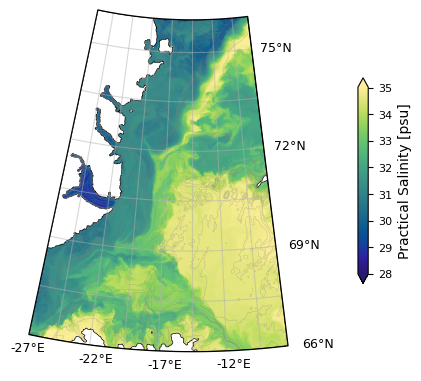

In [10]:
lon = depth['XC']
lat = depth['YC']

S = df_full_Z.S[0].sel(Z=0,method='nearest')


# Create a figure and axis with Cartopy using NorthPolarStereo projection
fig, ax = plt.subplots(figsize=(6.2217, 3.7), subplot_kw=dict(projection=ccrs.NorthPolarStereo(central_longitude=-15)), layout='constrained')

# Set the extent to focus on the desired geographical area
extent = [-27+15, -8+15, 66, 76]

ax.contour(lon,lat,depth_notZero,[0],colors='black', linewidths=0.5, transform=ccrs.PlateCarree())
ax.contour(lon,lat,depth_notZero,[100,200,300,400,500,750,1000,1500,2000,3000,4000],colors='grey', linewidths=0.5,alpha=0.3, transform=ccrs.PlateCarree())

cmap = cmo.haline


mesh = ax.pcolormesh(S.X,S.Y, S, cmap=cmap, zorder=0 , transform=ccrs.PlateCarree())

cbar = fig.colorbar(mesh,shrink=0.6,ax=ax,extend='both')
cbar.set_label('Practical Salinity [psu]')


# Create a custom path for the extent in PlateCarree projection
num_points = 100
bottom_lons = np.linspace(extent[0], extent[1], num_points)
top_lons = np.linspace(extent[1], extent[0], num_points)
bottom_lats = np.full_like(bottom_lons, extent[2])
top_lats = np.full_like(top_lons, extent[3])

# Combine the vertices
verts = np.vstack([
    np.column_stack([bottom_lons, bottom_lats]),
    np.column_stack([top_lons, top_lats])
])

# Transform the vertices to the NorthPolarStereo projection
proj = ccrs.NorthPolarStereo()
verts_proj = proj.transform_points(ccrs.PlateCarree(), verts[:, 0], verts[:, 1])
verts_proj = verts_proj[:, :2]  # Only keep x and y coordinates

# Create the path
codes = [Path.MOVETO] + [Path.LINETO] * (len(verts_proj) - 1) + [Path.CLOSEPOLY]
path = Path(np.vstack([verts_proj, verts_proj[0]]), codes)
patch = PathPatch(path, transform=ax.transData, edgecolor='black', facecolor='none')
ax.add_patch(patch)

# Set the boundary using the transformed path
ax.set_boundary(patch.get_path(), transform=ax.transData)

# Add gridlines without labels
ax.gridlines(draw_labels=False,alpha=0.5)

# Manually add the labels for the bottom and right sides
xticks = np.arange(extent[0]-15, extent[1]-15 + 1, 5)  # Adjust the range and step as needed
yticks = np.arange(extent[2], extent[3] + 1, 3)  # Adjust the range and step as needed

# Add bottom labels
for xtick in xticks:
    ax.text(xtick, extent[2]-0.2, f'{xtick}°E', transform=ccrs.PlateCarree(),
            fontsize=9, ha='center', va='top')

# Add right labels
for ytick in yticks:
    ax.text(extent[1] + 1-15, ytick, f'{ytick}°N', transform=ccrs.PlateCarree(),
            fontsize=9, ha='left', va='center')


fig.savefig(r'/nird/home/ekv036/MSc/Fig/RefS',dpi=300, facecolor='w', edgecolor='w',
          orientation='landscape', format=None,
          transparent=False, bbox_inches=None,pad_inches=0.25)

In [11]:
test_method = xr.open_dataset('/nird/projects/NS9608K/MSc_EK/Data/test_snapshot.nc')

In [12]:
test_method = test_method['S']
test_method

<xarray.DataArray 'S' (time: 12, Y: 518, X: 385)>
[2393160 values with dtype=float64]
Coordinates:
    Z        float64 ...
  * X        (X) float64 -26.96 -26.89 -26.83 -26.76 ... -8.094 -8.051 -8.007
  * Y        (Y) float64 66.01 66.02 66.04 66.05 ... 75.87 75.91 75.95 75.99
  * time     (time) datetime64[ns] 2017-09-01 2017-10-01 ... 2018-08-01
Attributes:
    long_name:      salinity
    coordinates:    XC YC RC iter
    standard_name:  sea_water_salinity
    units:          g kg-1

In [13]:
method = df_full_Z['S'].sel(Z=0,method='nearest')
method

<xarray.DataArray 'S' (time: 12, Y: 518, X: 385)>
[2393160 values with dtype=float64]
Coordinates:
    Z        float64 -1.0
  * X        (X) float64 -26.96 -26.89 -26.83 -26.76 ... -8.094 -8.051 -8.007
  * Y        (Y) float64 66.01 66.02 66.04 66.05 ... 75.87 75.91 75.95 75.99
    XC       (Y, X) float64 ...
    YC       (Y, X) float64 ...
  * time     (time) datetime64[ns] 2017-09-01 2017-10-01 ... 2018-08-01
Attributes:
    long_name:      salinity
    standard_name:  sea_water_salinity
    units:          g kg-1
    _coordinates:   XC YC RC iter

In [20]:
(method-test_method).max()

<xarray.DataArray 'S' ()>
array(0.)
Coordinates:
    Z        float64 -1.0

In [21]:
(method-test_method).min()

<xarray.DataArray 'S' ()>
array(0.)
Coordinates:
    Z        float64 -1.0